# Init Lib and Path

In [24]:
#load library
#coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
basedir = '../data/'
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 12, 4
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
# Customizng plots with style sheets
plt.style.use('ggplot')

#load xgb
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

/root/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Create Feature

In [20]:
def createOrderHistoryFeature(dataset):
    continent_gdp = pd.read_csv(basedir + "continent.csv")
    orderHistory = pd.read_csv(basedir + "orderHistory_" + dataset + ".csv")
    userComment = pd.read_csv(basedir + "userComment_" + dataset + ".csv")
#     userComment.loc[userComment.tags.isnull(), 'tags'] = 0
#     userComment.loc[userComment.tags.notnull(), 'tags'] = 1
#     userComment.loc[userComment.commentsKeyWords.isnull(), 'commentsKeyWords'] = 0
#     userComment.loc[userComment.commentsKeyWords.notnull(), 'commentsKeyWords'] = 1
    orderFuture = pd.read_csv(basedir + "orderFuture_" + dataset + ".csv")
    userOrderHistoryComment = pd.merge(orderHistory, userComment, on=["userid", "orderid"], how='left')
    userOrderHistoryComment = pd.merge(userOrderHistoryComment, continent_gdp, on=["continent",], how='left')
    
    userOrderHistoryComment.drop('commentsKeyWords', axis=1, inplace=True)
    userOrderHistoryComment.drop('orderid', axis=1, inplace=True)
    
    userOrderHistoryComment_group = userOrderHistoryComment.groupby('userid')

    orderDf = pd.DataFrame(orderFuture['userid'], columns = ['userid'])


    orderDf = orderDf.join(userOrderHistoryComment_group['orderType'].count(), on='userid')
    orderDf.rename(columns={'orderType': 'order_num'}, inplace=True)

    orderDf = orderDf.join(userOrderHistoryComment_group['rating'].mean(), on='userid')
    orderDf.rename(columns={'rating': 'rating_mean'}, inplace=True)
#     orderDf = orderDf.join(userOrderHistoryComment_group['rating'].max(), on='userid')
#     orderDf.rename(columns={'rating': 'rating_max'}, inplace=True)
    orderDf = orderDf.join(userOrderHistoryComment_group['rating'].min(), on='userid')
    orderDf.rename(columns={'rating': 'rating_min'}, inplace=True)
    orderDf = orderDf.join(userOrderHistoryComment_group['rating'].std(), on='userid')
    orderDf.rename(columns={'rating': 'rating_std'}, inplace=True)

    # Order Time
#     orderDf = orderDf.join(userOrderHistoryComment_group['orderTime'].mean(), on='userid')
#     orderDf.rename(columns={'orderTime': 'orderTime_mean'}, inplace=True)
#     orderDf = orderDf.join(userOrderHistoryComment_group['orderTime'].median(), on='userid')
#     orderDf.rename(columns={'orderTime': 'orderTime_median'}, inplace=True)
#     orderDf = orderDf.join(userOrderHistoryComment_group['orderTime'].min(), on='userid')
#     orderDf.rename(columns={'orderTime': 'orderTime_min'}, inplace=True)
#     orderDf = orderDf.join(userOrderHistoryComment_group['orderTime'].std(), on='userid')
#     orderDf.rename(columns={'orderTime': 'orderTime_std'}, inplace=True)

    orderDf = orderDf.join(userOrderHistoryComment_group['orderType'].sum(), on='userid')
    orderDf.rename(columns={'orderType': 'orderType_sum'}, inplace=True)

    orderDf = orderDf.join(userOrderHistoryComment_group['continent_gdp'].mean(), on='userid')
    orderDf.rename(columns={'continent_gdp': 'continent_gdp_mean'}, inplace=True)
    orderDf = orderDf.join(userOrderHistoryComment_group['continent_gdp'].max(), on='userid')
    orderDf.rename(columns={'continent_gdp': 'continent_gdp_max'}, inplace=True)
    orderDf = orderDf.join(userOrderHistoryComment_group['continent_gdp'].min(), on='userid')
    orderDf.rename(columns={'continent_gdp': 'continent_gdp_min'}, inplace=True)
    orderDf = orderDf.join(userOrderHistoryComment_group['continent_gdp'].std(), on='userid')
    orderDf.rename(columns={'continent_gdp': 'continent_gdp_std'}, inplace=True)

#     order_month = pd.read_csv(basedir + "order_month_" + dataset + ".csv")
#     orderDf = pd.merge(orderDf, order_month, on=["userid"], how='left')
    return orderDf


createOrderHistoryFeature("test").head(100)

,userid,order_num,rating_mean,rating_min,rating_std,orderType_sum,continent_gdp_mean,continent_gdp_max,continent_gdp_min,continent_gdp_std
0,100000000371,1.0,NaN,NaN,NaN,0.0,0.646000,0.646,0.646,NaN
1,100000001215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100000001445,5.0,5.0,5.0,NaN,0.0,1.460200,4.717,0.646,1.820607
3,100000001575,3.0,NaN,NaN,NaN,1.0,0.646000,0.646,0.646,0.000000
4,100000001601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100000001737,3.0,5.0,5.0,NaN,1.0,4.242000,4.242,4.242,0.000000
6,100000001829,1.0,NaN,NaN,NaN,0.0,4.717000,4.717,4.717,NaN
7,100000002055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100000002241,2.0,5.0,5.0,NaN,0.0,2.634000,2.634,2.634,0.000000
9,100000003067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def createUserProfileFeature(dataset):
    province_gdp = pd.read_csv(basedir + 'province_gdp.csv')[['province', 'capita_gdp']]
    userProfile = pd.read_csv(basedir + "userProfile_" + dataset + ".csv")
    
    userProfile_deal = pd.merge(userProfile, province_gdp, on=['province'], how='left')
    userProfile_deal = pd.merge(userProfile, province_gdp, on=['province'], how='left')
    # 利用province_rate的中位值填充缺失值
#     userProfile_deal['province_rate'].fillna(userProfile_deal['province_rate'].median(), inplace=True)
    userProfile_deal.drop('province', axis=1, inplace=True)
    
    # userProfile_deal.drop('city_gdp', axis=1, inplace=True)
    # userProfile_deal['age'].fillna("null", inplace=True)
    userProfile_deal = pd.get_dummies(userProfile_deal, columns=['age'], dummy_na=True)
    userProfile_deal = pd.get_dummies(userProfile_deal, columns=['gender'], dummy_na=True)

    return userProfile_deal
createUserProfileFeature("train").head(3)

,userid,capita_gdp,age_00后,age_60后,age_70后,age_80后,age_90后,age_nan,gender_女,gender_男,gender_nan
0,100000000013,NaN,0,1,0,0,0,0,0,1,0
1,100000000111,12.2,0,0,0,0,0,1,0,0,1
2,100000000127,12.2,0,0,0,0,0,1,0,0,1


In [22]:
def createActionTimeFeature(dataset):
    action_dataset = pd.read_csv(basedir + "action_" + dataset + ".csv")
    orderFuture = pd.read_csv(basedir + "orderFuture_" + dataset + ".csv")[['userid']]

    action_group = action_dataset.groupby('userid')
    action_time_df =  action_group.agg({'actionTime':['sum', 'mean', 'std']})
    
    return orderFuture.join(action_time_df, on='userid')
    
createActionTimeFeature('train').head(3)

,userid,"(actionTime, sum)","(actionTime, mean)","(actionTime, std)"
0,100000000013,212773237028,1487924734,8.187104e+06
1,100000000111,4472914358,1490971452,2.371357e+01
2,100000000127,8955318302,1492553050,2.994918e+06


In [25]:
def createTotalFeatures(dataset):

    action_type_rate = pd.read_csv(basedir + "action_rate_" + dataset + ".csv")
    user_month_action = pd.read_csv(basedir + "user_month_" + dataset + ".csv")
    action_interval_train = pd.read_csv(basedir + "action_interval_"+ dataset + ".csv")
    tag_score = pd.read_csv(basedir + "user_tagScore_" + dataset + ".csv")
    
    orderDf = createOrderHistoryFeature(dataset)
    #actionDf = createActionTimeFeature(dataset)
    userProfile_deal = createUserProfileFeature(dataset)
    
    action_result = pd.merge(user_month_action, action_type_rate, on=["userid"], how='left')
    print action_result.columns
    train_data = pd.merge(orderDf, action_result, on=['userid'], how='left')
    # train_data = pd.merge(train_data, actionDf, on=['userid'], how='left')
    train_data = pd.merge(userProfile_deal, train_data, on = ['userid'], how = 'left')
    if dataset == 'train':
        orderFuture_train = pd.read_csv(basedir + "trainingset/orderFuture_train.csv")
        train_data = pd.merge(orderFuture_train, train_data, on=['userid'], how='left')
        train_data.rename(columns={'orderType': 'label'}, inplace=True)

    
    train_data = pd.merge(train_data, action_interval_train, on=['userid'], how='left')
    
    
    train_data = pd.merge(train_data, tag_score, on=['userid'], how='left')
    
    return train_data

createTotalFeatures('test').to_csv(basedir + 'test_data.csv', index = False)
createTotalFeatures('train').to_csv(basedir + 'train_data.csv', index = False)

Index([u'userid', u'month1', u'month2', u'month3', u'month4', u'month5',
       u'month6', u'month7', u'month8', u'month9', u'month10', u'month11',
       u'month12', u'actionType1Count', u'actionType1Rate',
       u'actionType24Count', u'actionType24Rate', u'actionType5Count',
       u'actionType5Rate', u'actionType6Count', u'actionType6Rate',
       u'actionType7Count', u'actionType7Rate', u'actionType8Count',
       u'actionType8Rate', u'actionType9Count', u'actionType9Rate'],
      dtype='object')
Index([u'userid', u'month1', u'month2', u'month3', u'month4', u'month5',
       u'month6', u'month7', u'month8', u'month9', u'month10', u'month11',
       u'month12', u'actionType1Count', u'actionType1Rate',
       u'actionType24Count', u'actionType24Rate', u'actionType5Count',
       u'actionType5Rate', u'actionType6Count', u'actionType6Rate',
       u'actionType7Count', u'actionType7Rate', u'actionType8Count',
       u'actionType8Rate', u'actionType9Count', u'actionType9Rate'],
      dt

# Train_xgb

In [28]:
target= 'label'
IDcol = 'userid'

train_data = pd.read_csv(basedir + 'train_data.csv')
# test_data = pd.read_csv(basedir + 'test_data.csv')
Feature = [x for x in train_data.columns if x not in ['label', 'userid']]

def modelfit(alg, dtrain, dtest, Feature,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #  指定训练数据集和标签
        xgtrain = xgb.DMatrix(dtrain[Feature].values, label=dtrain[target].values)
        # 指定测试数据集
        xgtest = xgb.DMatrix(dtest[Feature].values)
        
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        print cvresult.shape[0]
        alg.set_params(n_estimators=cvresult.shape[0])
    
    alg.fit(dtrain[Feature], dtrain['label'], eval_metric='auc')
    
    dtest_predictions = alg.predict(dtest[Feature])
    dtest_predprob = alg.predict_proba(dtest[Feature])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtest['label'].values, dtest_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtest['label'], dtest_predprob)
                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    print feat_imp
    feat_imp.plot(kind='bar', title='Feature Importances', figsize=(16, 5))
    plt.ylabel('Feature Importance Score')

In [32]:
xgb1 = XGBClassifier(
        learning_rate=0.1,
        n_estimators=1000,
        max_depth=5, # 树的最大深度
        min_child_weight=1, # 决定最小叶子节点样本权重和
        # 在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点，Gamma指定了节点分裂所需的最小损失函数下降值
        # 值越大，算法越保守
        gamma=0, 
        subsample=0.8, # 控制对于每颗树，随机采样的比例，0.8适合本题目
        colsample_bytree=0.8, # 控制每棵树随机采样的列数的占比
        objective= 'binary:logistic',
        # nthread=4, XGBoost运行时的线程数，缺省值是当前系统可以获得的最大线程数
        scale_pos_weight=1, # 在各类样本十分不平衡时，把这个参数设定为一个正值，可以使算法更快收敛
        seed=27, # 随机数的种子，设置它可以复现随机数据的结果，也可以用于调整参数
        nthread=3
        )

train_data_sample = train_data.sample(frac=1.0)  # 全部打乱
cut_idx = int(round(0.2 * train_data.shape[0]))
train_test, train_train = train_data.iloc[:cut_idx], train_data.iloc[cut_idx:]
# print train_data.shape, train_test.shape, train_train.shape  # (40307, 126) (8061, 126) (32246, 126)

modelfit(xgb1, train_train, train_test, Feature, cv_folds=5)

NameError: name 'Feature' is not defined

In [38]:
target= 'label'
IDcol = 'userid'

train_data = pd.read_csv(basedir + 'train_data.csv')
# test_data = pd.read_csv(basedir + 'test_data.csv')
Feature = [x for x in train_data.columns if x not in ['label', 'userid']]

xgb1 = XGBClassifier(
        learning_rate=0.1,
        n_estimators=1000,
        max_depth=5, # 树的最大深度
        min_child_weight=1, # 决定最小叶子节点样本权重和
        # 在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点，Gamma指定了节点分裂所需的最小损失函数下降值
        # 值越大，算法越保守
        gamma=0, 
        subsample=0.8, # 控制对于每颗树，随机采样的比例，0.8适合本题目
        colsample_bytree=0.8, # 控制每棵树随机采样的列数的占比
        objective= 'binary:logistic',
        # nthread=4, XGBoost运行时的线程数，缺省值是当前系统可以获得的最大线程数
        scale_pos_weight=1, # 在各类样本十分不平衡时，把这个参数设定为一个正值，可以使算法更快收敛
        seed=27, # 随机数的种子，设置它可以复现随机数据的结果，也可以用于调整参数
        nthread=3
        )

train_data = pd.read_csv(basedir + 'train_data.csv')
# test_data = pd.read_csv(basedir + 'test_data.csv')
Feature = [x for x in train_data.columns if x not in ['label', 'userid']]
train_data_sample = train_data.sample(frac=1.0)  # 全部打乱
cut_idx = int(round(0.2 * train_data.shape[0]))
train_test, train_train = train_data.iloc[:cut_idx], train_data.iloc[cut_idx:]
# print train_data.shape, train_test.shape, train_train.shape  # (40307, 126) (8061, 126) (32246, 126)
dtrain = train_train
dtest = train_test
cv_folds=5
early_stopping_rounds=50

#  指定训练数据集和标签
xgtrain = xgb.DMatrix(dtrain[Feature].values, label=dtrain[target].values)
# 指定测试数据集
xgtest = xgb.DMatrix(dtest[Feature].values)

cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
print cvresult.shape[0]
xgb1.set_params(n_estimators=cvresult.shape[0])

xgb1.fit(dtrain[Feature], dtrain['label'], eval_metric='auc')


465


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=465,
       n_jobs=1, nthread=3, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)


Model Report
Accuracy : 0.9304
AUC Score (Train): 0.952762
<type 'str'>
lastInteval2           389
lastInteval1           376
action5min             341
lastInteval4           337
action1DistanceTime    319
actionType6Rate        305
firstInteval           299
lastInteval3           298
actionType5Rate        292
intevalMean            284
actionType1Rate        255
capita_gdp             254
intevalMin             240
intevalStd             235
type1IntervalMin       230
action6min             227
last3IntevalStd        223
last3IntevalMean       210
action5mean            201
action5DistanceTime    167
type1IntervalMean      164
month4                 164
action5std             154
last1Action            149
tagScore               145
type1IntervalMax       142
actionType5Count       141
type1IntervalStd       140
actionType6Count       130
action5max             130
                      ... 
action3max              22
age_nan                 22
action9std              22
type9Inte

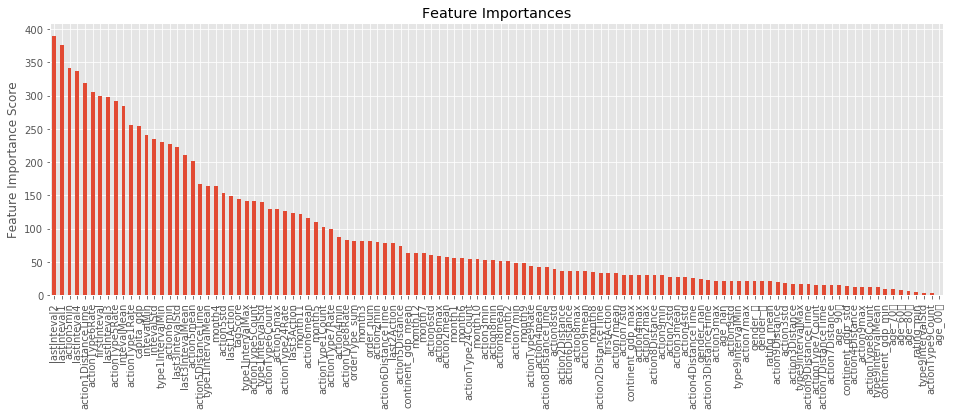

In [58]:
dtest_predictions = xgb1.predict(dtest[Feature])
dtest_predprob = xgb1.predict_proba(dtest[Feature])[:,1]
        
    #Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dtest['label'].values, dtest_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(dtest['label'], dtest_predprob)

feat_imp = pd.Series(xgb1.get_booster().get_score()).sort_values(ascending=False)
print feat_imp
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(16, 5))
plt.ylabel('Feature Importance Score')

In [62]:
xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.818351,0.025554,0.825104,0.021186
1,0.869430,0.005478,0.877178,0.005842
2,0.881599,0.002687,0.888935,0.007972
3,0.887117,0.005180,0.894902,0.004465
4,0.889435,0.004416,0.897281,0.005775
5,0.890564,0.004468,0.898627,0.005884
6,0.892254,0.004276,0.900373,0.005423
7,0.894232,0.005837,0.902159,0.004574
8,0.895852,0.005267,0.904034,0.004193
9,0.897596,0.005164,0.905180,0.004209
